
1.1. Gender column dtype:
 category

2.1. Gender column with specified categories:
 0    Female
1      Male
2      Male
3      Male
Name: Gender, dtype: category
Categories (2, object): ['Male' < 'Female']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    4 non-null      object  
 1   Gender  4 non-null      category
 2   City    4 non-null      object  
dtypes: category(1), object(2)
memory usage: 797.0 bytes

3.1. DataFrame info (before converting City to categorical):
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Name    4 non-null      object  
 1   Gender  4 non-null      category
 2   City    4 non-null      category
dtypes: category(2), object(1)
memory usage: 973.0 bytes

3.1. DataFrame info (after con

/var/folders/5l/hhtzrw4n6kl1cymh7srrsy1c0000gn/T/ipykernel_35111/1120442873.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Gender').size()


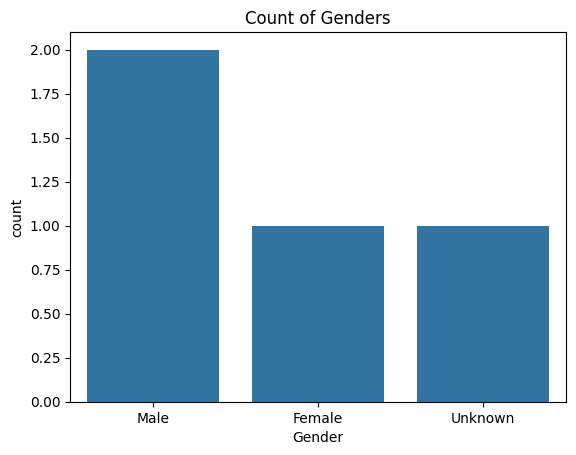

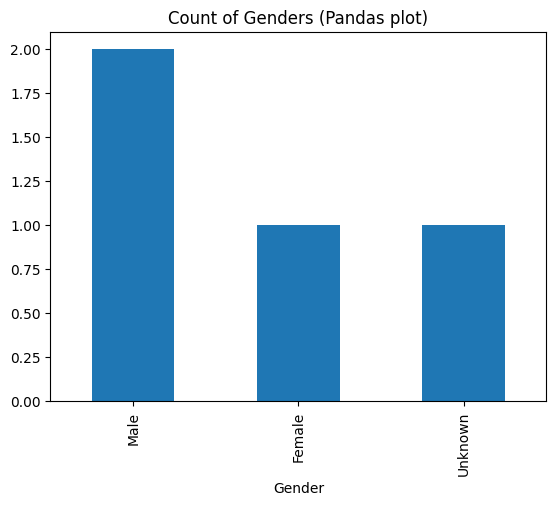

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Creating Categorical Data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Gender': ['Female', 'Male', 'Male', 'Male'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
df = pd.DataFrame(data)

df['Gender'] = pd.Categorical(df['Gender'])
print("\n1.1. Gender column dtype:\n", df['Gender'].dtype)

# 2. Specifying Categories
df['Gender'] = pd.Categorical(df['Gender'], categories=['Male', 'Female'], ordered=True)
print("\n2.1. Gender column with specified categories:\n", df['Gender'])

# 3. Benefits of Categorical Data
print("\n3.1. DataFrame info (before converting City to categorical):\n", df.info(memory_usage='deep'))

df['City'] = pd.Categorical(df['City'])
print("\n3.1. DataFrame info (after converting City to categorical):\n", df.info(memory_usage='deep'))

# 4. Operations on Categorical Data
df_sorted = df.sort_values(by='Gender')
print("\n4.1. Sorted DataFrame by Gender:\n", df_sorted)

grouped = df.groupby('Gender').size()
print("\n4.1. Grouped by Gender (size):\n", grouped)

# 5. Encoding Categorical Data
df_encoded = pd.get_dummies(df, columns=['Gender'])
print("\n5.1. One-hot encoded DataFrame:\n", df_encoded)

df['Gender_Code'] = df['Gender'].cat.codes
print("\n5.1. DataFrame with label encoded Gender:\n", df)

# 6. Handling Missing Values in Categorical Data
df.loc[1, 'Gender'] = None  # Introduce a missing value
print("\n6.1. DataFrame with missing Gender value:\n", df)

# *** KEY CHANGE: Add 'Unknown' to the categories ***
if 'Unknown' not in df['Gender'].cat.categories:  # Check if 'Unknown' is already a category
    df['Gender'] = df['Gender'].cat.add_categories('Unknown')

# Now you can fill the missing value
df['Gender'] = df['Gender'].fillna('Unknown')

print("\n6.1. DataFrame with filled Gender value:\n", df)

# 7. Plotting Categorical Data
sns.countplot(x='Gender', data=df)
plt.title('Count of Genders')
plt.show()

df['Gender'].value_counts().plot(kind='bar')  # Pandas plot
plt.title('Count of Genders (Pandas plot)')
plt.show()